# 使用手寫辨識資料集, 觀察 PCA 算法

# [作業目標]
- 試著模仿範例寫法, 以變更參數後的 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

# [作業重點]
- 以手寫辨識資料集, 觀察變更參數後的 PCA 算法, 在取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[5], Out[5])

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [6]:
# 定義 PCA 與隨後的羅吉斯迴歸函數
# penalty 改為 L1, max_iter 改為 100
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
x = digits.data
y = digits.target

# 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

In [7]:
# 先執行 GridSearchCV 跑出最佳參數
logistic = SGDClassifier(loss = 'log', penalty = 'l1', max_iter = 100, tol = 1e-5, random_state = 0)
pipe = Pipeline(steps = [('pca', pca), ('logistic', logistic)])
params =  {
    'pca__n_components' : [4,16,24,32,36,42,56,64],
    'logistic__alpha' : np.logspace(-5,2,5)
}

gs = GridSearchCV(pipe, params, iid = False, cv = 5, return_train_score = False)
gs.fit(x,y)
print(f'Best Params : {gs.best_params_}, Best Score : {gs.best_score_}')

Best Params : {'logistic__alpha': 1e-05, 'pca__n_components': 56}, Best Score : 0.9149089454789865


In [8]:
gs.best_estimator_

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=56, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', SGDClassifier(alpha=1e-05, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.1...dom_state=0, shuffle=True, tol=1e-05,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [9]:
results = pd.DataFrame(gs.cv_results_)
results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.117745,0.129809,0.000961,0.000864,1e-05,4,"{'logistic__alpha': 1e-05, 'pca__n_components'...",0.681319,0.566298,0.729805,0.700280,0.664789,0.668498,0.055483,24
1,0.050748,0.015270,0.000553,0.000053,1e-05,16,"{'logistic__alpha': 1e-05, 'pca__n_components'...",0.917582,0.823204,0.905292,0.935574,0.856338,0.887598,0.041563,19
2,0.062655,0.009627,0.000579,0.000049,1e-05,24,"{'logistic__alpha': 1e-05, 'pca__n_components'...",0.925824,0.859116,0.922006,0.943978,0.878873,0.905959,0.031703,5
3,0.072218,0.005876,0.000725,0.000204,1e-05,32,"{'logistic__alpha': 1e-05, 'pca__n_components'...",0.909341,0.867403,0.916435,0.941176,0.892958,0.905463,0.024559,6
4,0.088537,0.006757,0.000669,0.000083,1e-05,36,"{'logistic__alpha': 1e-05, 'pca__n_components'...",0.912088,0.837017,0.924791,0.963585,0.898592,0.907215,0.041261,3
5,0.090720,0.002748,0.000740,0.000146,1e-05,42,"{'logistic__alpha': 1e-05, 'pca__n_components'...",0.901099,0.856354,0.935933,0.941176,0.884507,0.903814,0.031813,8
6,0.111536,0.006851,0.000790,0.000312,1e-05,56,"{'logistic__alpha': 1e-05, 'pca__n_components'...",0.923077,0.864641,0.938719,0.960784,0.887324,0.914909,0.034716,1
7,0.119660,0.011579,0.000729,0.000141,1e-05,64,"{'logistic__alpha': 1e-05, 'pca__n_components'...",0.909341,0.848066,0.938719,0.952381,0.876056,0.904913,0.038678,7
8,0.056585,0.003605,0.000510,0.000023,0.000562341,4,"{'logistic__alpha': 0.0005623413251903491, 'pc...",0.711538,0.591160,0.690808,0.722689,0.667606,0.676760,0.046749,23
9,0.073068,0.007050,0.000541,0.000059,0.000562341,16,"{'logistic__alpha': 0.0005623413251903491, 'pc...",0.925824,0.825967,0.905292,0.929972,0.859155,0.889242,0.040407,18


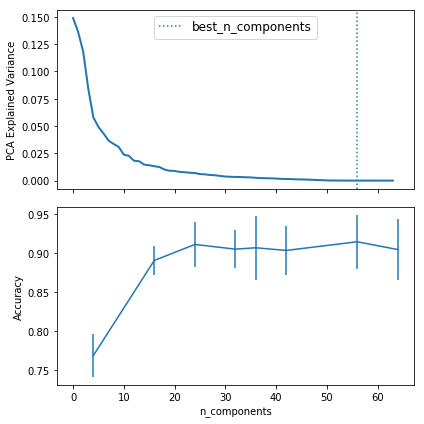

In [10]:
# 繪製不同 components 的 PCA 解釋度
pca.fit(x)

fig, (ax0, ax1) = plt.subplots(nrows = 2, sharex = True, figsize = (6,6))
ax0.plot(pca.explained_variance_ratio_, linewidth = 2)
ax0.set_ylabel('PCA Explained Variance')

ax0.axvline(gs.best_estimator_.named_steps['pca'].n_components, linestyle = ':', label = 'best_n_components')
ax0.legend(prop = dict(size=12))

best_clfs = results.groupby('param_pca__n_components').apply(lambda x : x.nlargest(1, 'mean_test_score'))
best_clfs.plot(x = 'param_pca__n_components', y = 'mean_test_score', yerr = 'std_test_score', legend = False, ax = ax1)
ax1.set_xlabel('n_components')
ax1.set_ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [ ]:
# 繪製不同採樣點的分類正確率
